In [2]:
import pandas as pd;
import numpy as np; 
import seaborn as sns; 
import csv

cleaned = pd.read_csv("DataCleaned.csv", parse_dates=True,encoding='latin1')
category = pd.read_csv("Category.csv", parse_dates=True,encoding='latin1')
tags =  pd.read_csv("Tags.csv", parse_dates=True,encoding='latin1')

data1= pd.merge(category,cleaned, right_on ="category_id", left_on="id")
df = pd.merge(data1,tags, on="Channel_title")




In [3]:
# take a random sample
df.sample(5)


,id,Category Name,CITY,STATE,COUNTRY,trending_date,title_x,Channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,title_y,Name,Value
11615198,27,Education,Denver,CO,USA,18.04.01,How to manage your time more effectively (acco...,TED-Ed,27,2018-01-02T15:58:30.000Z,"TEDEd""|""TED Ed""|""TED-Ed""|""TED Education""|""anim...",441454,18228,385,528,https://i.ytimg.com/vi/iDbdXTMnOmE/default.jpg,False,False,False,How does your body know you're full? - Hilary ...,tags2,"""TED-Ed"""
251062,1,Film & Animation,Kahului,HI,USA,18.07.01,Getting dressed in the 18th century - working ...,CrowsEyeProductions,1,2018-01-05T14:36:12.000Z,"history""|""clothing""|""costume""|""dressing""|""asmr...",351968,5576,266,1061,https://i.ytimg.com/vi/nUmO7rBMdoU/default.jpg,False,False,False,Getting dressed in the 18th century - working ...,tags16,"""liv free"""
4328174,22,People & Blogs,Portland,OR,USA,18.12.01,MY THOUGHTS ABOUT MAKING THE FORBES LIST,SuperwomanVlogs,22,2018-01-06T21:10:09.000Z,"lilly singh""|""lilly singh vlogs""|""lilly vlogs""...",298003,15863,1012,1446,https://i.ytimg.com/vi/M3W0ELaAOIg/default.jpg,False,False,False,MY THOUGHTS ABOUT MAKING THE FORBES LIST,tags8,"""iisuperwomanii"""
1143772,10,Music,Dallas-Fort Worth,TX,USA,17.28.12,Making new sounds using artificial intelligence,ANDREW HUANG,10,2017-12-21T15:30:00.000Z,"andrew""|""huang""|""andrew huang""|""music""|""musici...",117972,9067,97,1597,https://i.ytimg.com/vi/AaALLWQmCdI/default.jpg,False,False,False,Making music with LEGO,tags1,"andrew"""
5542933,23,Comedy,Philadelphia,PA,USA,18.01.03,DOING MAKE UP WITH GARDENING TOOLS!!,Liza Koshy,23,2018-02-21T23:05:10.000Z,"liza""|""lizza""|""lizzza""|""lizzzavine""|""lizzzak""|...",4116523,361402,4121,17675,https://i.ytimg.com/vi/08OhPK2BVIU/default.jpg,False,False,False,MY NEW CAREER. A NEW EPISODE!,tags12,"""mcatee"""


In [4]:
#view data typs
df.dtypes


id                         int64
Category Name             object
CITY                      object
STATE                     object
COUNTRY                   object
trending_date             object
title_x                   object
Channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
title_y                   object
Name                      object
Value                     object
dtype: object

In [ ]:
#Dimensions
df.shape

(12450102, 22)

In [ ]:
#statestical summery
df.describe

In [5]:
df_summary = df.describe(include="all")
df_summary

,id,Category Name,CITY,STATE,COUNTRY,trending_date,title_x,Channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,title_y,Name,Value
count,1.245010e+07,12450102,12450102,12450102,12450102,12450102,12450102,12450102,1.245010e+07,12450102,12450102,1.245010e+07,1.245010e+07,1.245010e+07,1.245010e+07,12450102,12450102,12450102,12450102,12450102,12450102,12450102
unique,NaN,16,147,50,1,125,4448,1761,NaN,4333,4031,NaN,NaN,NaN,NaN,4389,2,2,2,4448,32,31776
top,NaN,Entertainment,Atlanta,CA,USA,18.10.03,Kelly Clarkson Had an Awkward Moment with Mery...,NFL,NaN,2018-02-28T11:00:01.000Z,"The Late Show""|""Stephen Colbert""|""Colbert""|""La...",NaN,NaN,NaN,NaN,https://i.ytimg.com/vi/OG6qjAivguw/default.jpg,False,False,False,Kelly Clarkson Had an Awkward Moment with Mery...,tags1,"""funny"""
freq,NaN,3128833,1468091,1611890,12450102,115644,34552,363170,NaN,34552,214578,NaN,NaN,NaN,NaN,34552,12336067,12433552,12449878,33810,818624,67938
mean,2.145548e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.145548e+01,NaN,NaN,1.235598e+06,4.128303e+04,1.811440e+03,4.909834e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6.591686e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.591686e+00,NaN,NaN,3.363836e+06,1.205028e+05,1.485718e+04,1.731077e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.200000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.200000e+01,NaN,NaN,1.943960e+05,3.939000e+03,1.680000e+02,5.260000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.400000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.400000e+01,NaN,NaN,4.778930e+05,1.275800e+04,4.780000e+02,1.465000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.500000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000e+01,NaN,NaN,1.224274e+06,3.235600e+04,1.327000e+03,3.982000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Unique value: value counts of a specific column
df['category_id'].value_counts()

In [ ]:
# Look at selected columns
intrest=['title_x','views','likes','dislikes','comment_count']
df[intrest].sample(5)
stat_summary = df[intrest].describe(include="all")
stat_summary

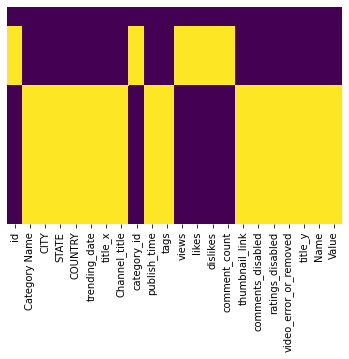

In [6]:
# Use heatmap to check missing data
sns.heatmap(df_summary.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
# See counts of missing value
for c in df_summary.columns:
    print(c,np.sum(df_summary[c].isnull()))
   

id 3
Category Name 7
CITY 7
STATE 7
COUNTRY 7
trending_date 7
title_x 7
Channel_title 7
category_id 3
publish_time 7
tags 7
views 3
likes 3
dislikes 3
comment_count 3
thumbnail_link 7
comments_disabled 7
ratings_disabled 7
video_error_or_removed 7
title_y 7
Name 7
Value 7


In [ ]:
# Replace missing data
df_summary['views'].fillna(df_summary['views'].mean(), inplace=True)  
df_summary['likes'].fillna(df_summary['likes'].mean(), inplace=True)  
df_summary['dislikes'].fillna(df_summary['dislikes'].mean(), inplace=True)
df_summary['comment_count'].fillna(df_summary['comment_count'].mean(), inplace=True)

In [ ]:
# Drop unnecessary columns
df_summary.drop(['thumbnail_link'], axis=1, inplace=True)
df_summary.drop(['comments_disabled'], axis=1, inplace=True)
df_summary.drop(['video_error_or_removed'], axis=1, inplace=True)
df_summary.drop(['ratings_disabled'], axis=1, inplace=True)

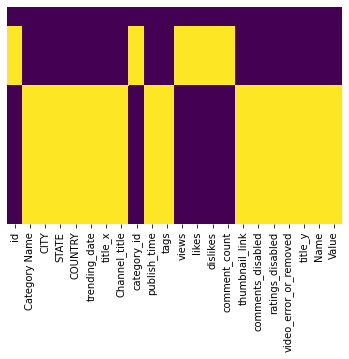

In [8]:
sns.heatmap(df_summary.isnull(), yticklabels=False, cbar=False, cmap='viridis')